# Estudo Dirigido 8

### Aluno: Daniel da Rocha Carneiro

---

#### Importações

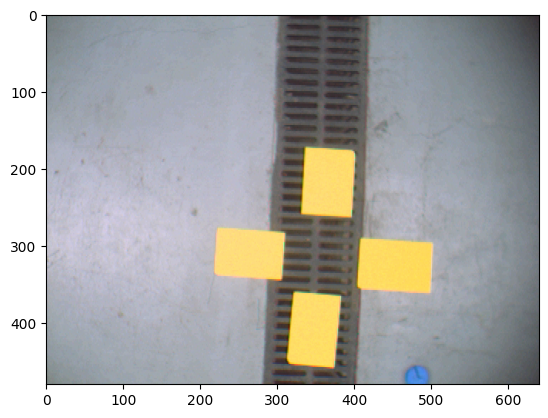

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
from colour.plotting import *

img = cv.imread("yellowtargets.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [16]:
targets = img.copy().reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(targets)

centers = kmeans.cluster_centers_
labels = kmeans.labels_
center2 = targets.copy()
for i in range(len(targets)):
    targets[i] = centers[labels[i]]
    center2[i] = 0 if labels[i] != 2 else centers[labels[i]]

targets = targets.reshape(img.shape)
center2 = center2.reshape(img.shape) # Cores dos clusters

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Grupos (Cores)')

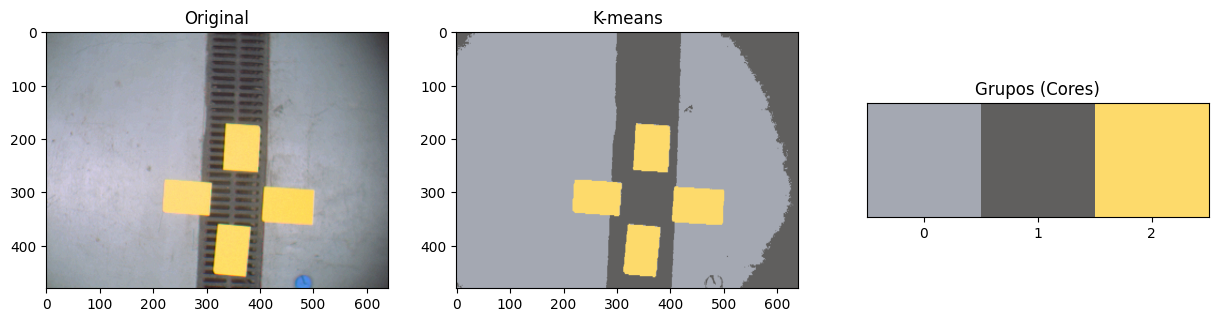

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(targets)
axs[1].set_title("K-means")
axs[2].imshow(centers.reshape(1, 3, 3) / 255)
axs[2].set_xticks([0,1,2])
axs[2].set_yticks([])
axs[2].set_title("Grupos (Cores)")

#### Isolamento dos alvos amarelos e cromaticidade

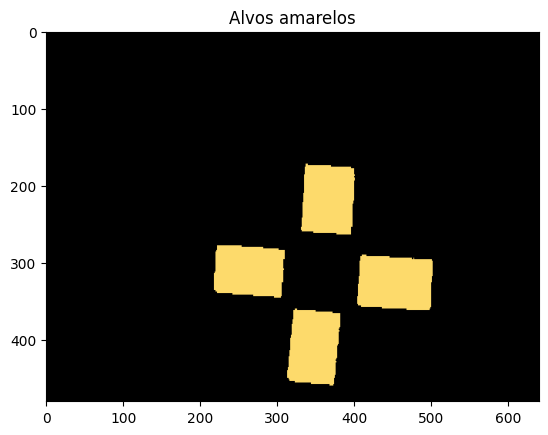

In [18]:
plt.imshow(center2)
plt.title('Alvos amarelos')

yellowRGB = centers[2]

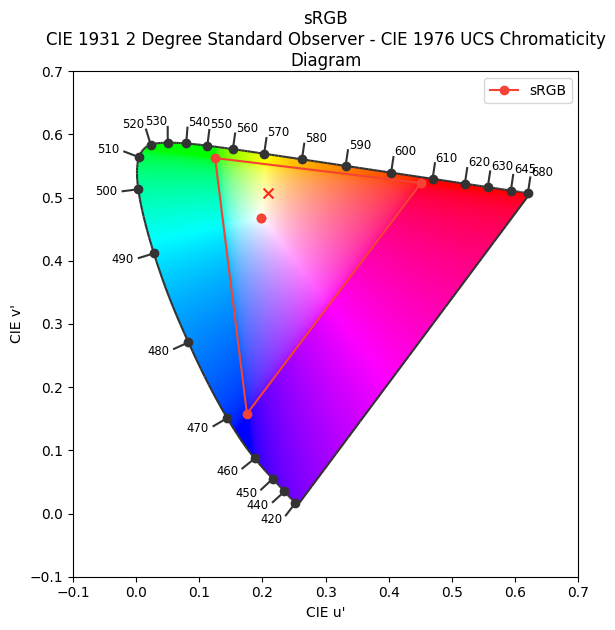

In [19]:
fig, axs = plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(yellowRGB, scatter_kwargs={"s": 50, "c": "red", "marker": "x"})

#### Cálculo do centróide dos alvos amarelos

Centróides: [(347, 409), (452, 326), (263, 310), (365, 218)]


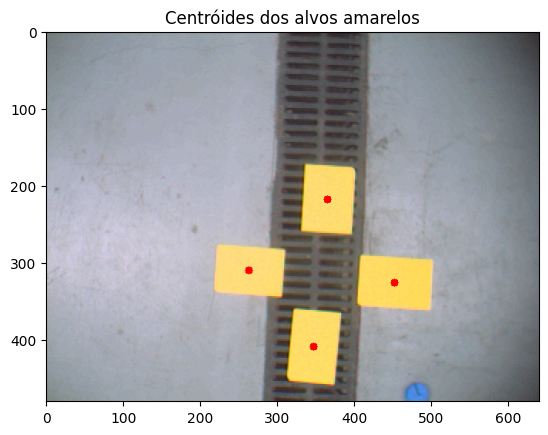

In [20]:
# Converte a imagem com os alvos amarelos isolados para escala de cinza
gray = cv.cvtColor(center2, cv.COLOR_RGB2GRAY)

# Cria a imagem binária
_, thresh = cv.threshold(gray, 1, 255, cv.THRESH_BINARY)

# Identifica os contornos
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Calcula os centroides
centroids = []
for contour in contours:
    # Calculate the moments of the contour
    M = cv.moments(contour)
    
    # Calculate centroid coordinates
    if M['m00'] != 0:  # Ensure the region has a non-zero area
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroids.append((cx, cy))


for centroid in centroids:
    cv.circle(img, centroid, 5, (255, 0, 0), -1)



plt.imshow(img)
plt.title('Centróides dos alvos amarelos')

print("Centróides:", centroids)